In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
os.listdir('/kaggle/input/')

['titanic']

Importing the training set

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Encoding categorical variables - Sex - into numerical values

In [5]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [6]:
train['Sex'] = enc.fit_transform(train.loc[:, train.columns == 'Sex'])
print(enc.categories_)

[array(['female', 'male'], dtype=object)]


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(test_size = 0.1, random_state = 3)
for train_index, test_index in split.split(train, train[['Pclass', 'Sex']]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

In [8]:
import matplotlib.pyplot as plt
def hist_plot(data, feature, bins):
    data[feature].hist(bins = bins)
    plt.show()

In [9]:
trainx = strat_train_set.loc[:, strat_train_set.columns != 'Survived']
testx = strat_test_set.loc[:, strat_test_set.columns != 'Survived']
print(trainx.shape)
trainx.head()

(801, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
842,843,1,"Serepeca, Miss. Augusta",0.0,30.0,0,0,113798,31.0000,NaN,C
542,543,3,"Andersson, Miss. Sigrid Elisabeth",0.0,11.0,4,2,347082,31.2750,NaN,S
425,426,3,"Wiseman, Mr. Phillippe",1.0,NaN,0,0,A/4. 34244,7.2500,NaN,S
462,463,1,"Gee, Mr. Arthur H",1.0,47.0,0,0,111320,38.5000,E63,S
50,51,3,"Panula, Master. Juha Niilo",1.0,7.0,4,1,3101295,39.6875,NaN,S


In [10]:
trainy = strat_train_set.loc[:,'Survived'].to_frame()
testy = strat_test_set.loc[:, 'Survived'].to_frame()
print(trainy.shape)
trainy.head()

(801, 1)


,Survived
842,1
542,0
425,0
462,0
50,0


Testing the distribution of Sex b/w train and test set

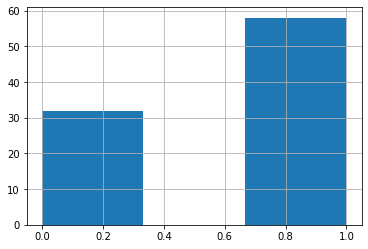

In [11]:
hist_plot(testx, 'Sex', 3)

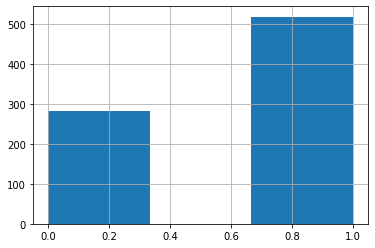

In [12]:
hist_plot(trainx, 'Sex', 3)

Finding correlation b/w features and target variable('Survived')

In [13]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

Valuable correlation of features with survival: Pclass, Embarked and Sex - negatively correlated; Fare - positively correlated; but not to significant extent 

Building a simple Logistic Regression model using scikit learn library

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 3).fit(trainx[['Pclass', 'Sex', 'Fare']], trainy.values.ravel())

In [15]:
prediction = clf.predict(testx[['Pclass', 'Sex', 'Fare']])

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testy, prediction, normalize = True)
accuracy

0.8333333333333334

Accuracy of a simple logistic regression employing three features Pclass, Sex and Fare

In [17]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
test_stats = test.describe(include = 'all')

In [19]:
def prediction(test):
    test['Sex'] = enc.fit_transform(test.loc[:, test.columns == 'Sex'])
    test['Pclass'].fillna(test['Pclass'].mode(), inplace = True)
    test['Sex'].fillna(test['Sex'].mode(), inplace = True)
    test['Fare'].fillna(test['Fare'].mean(), inplace = True)
    predict = clf.predict(test[['Pclass', 'Sex', 'Fare']])
    return predict

In [20]:
test_predictions = prediction(test)
test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Creating submission file

In [21]:
submission = pd.DataFrame()

In [22]:

submission['PassengerId'] = test['PassengerId']
submission['Survived'] = test_predictions
submission.to_csv("submission.csv", index = False)